In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn


In [2]:
import pandas as pd

# Load dataset 
df = pd.read_csv("Fraud.csv")  
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Check for missing values
print(df.isnull().sum())


df.dropna(inplace=True)

# Check data types
df.info()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


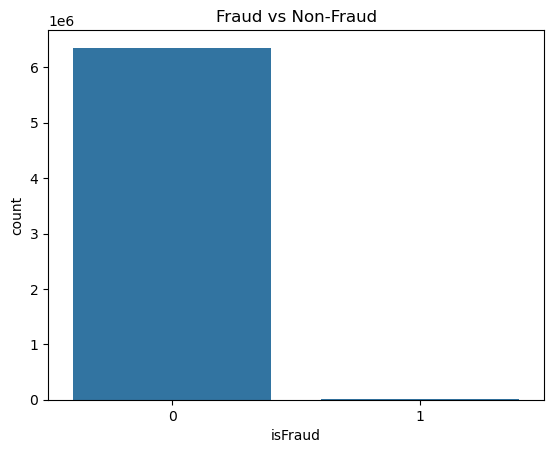

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check fraud vs non-fraud
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud")
plt.show()


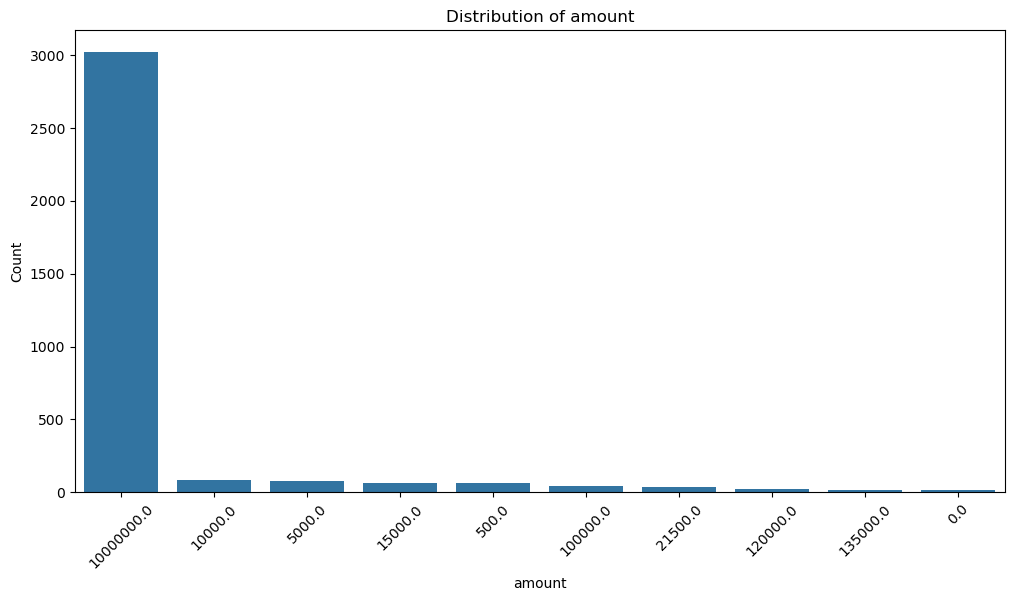


Value counts for amount:
amount
10000000.0    3020
10000.0         85
5000.0          74
15000.0         66
500.0           62
100000.0        41
21500.0         36
120000.0        25
135000.0        18
0.0             15
Name: count, dtype: int64


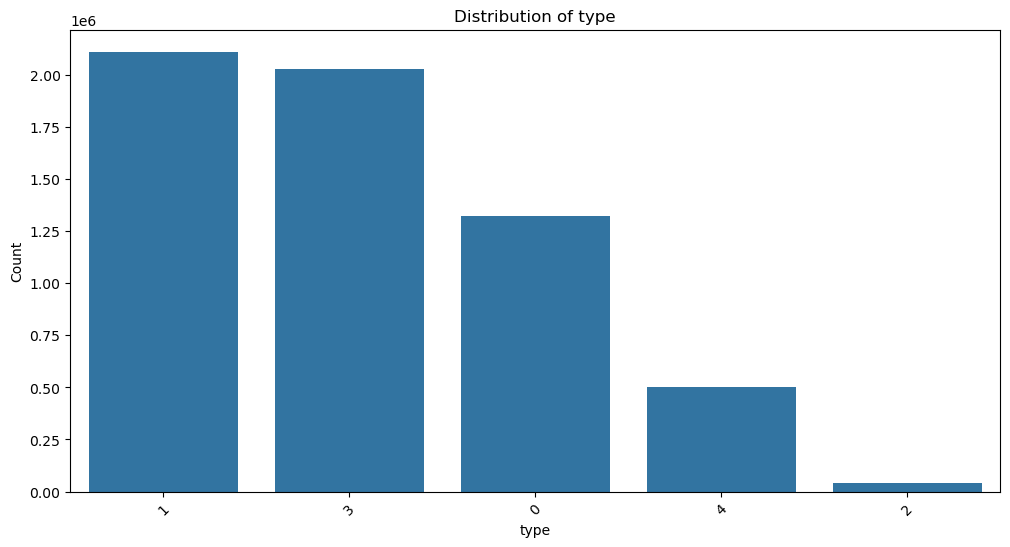


Value counts for type:
type
1    2110174
3    2028818
0    1319569
4     502394
2      39045
Name: count, dtype: int64


In [20]:
# Count plots for categorical features
categorical_features = ["amount", "type"]

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=df, x=feature, order=df[feature].value_counts().iloc[:10].index
    )  # Show top 10
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    # Display value counts for each feature
    print(f"\nValue counts for {feature}:")
    print(df[feature].value_counts().head(10))  # Show top 10

In [12]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load Dataset
df = pd.read_csv("Fraud.csv")  
print("Dataset Loaded Successfully. Shape:", df.shape)

# Step 3: Use a smaller sample for development
df = df.sample(n=6000000, random_state=42)
print("Sampled Dataset Shape:", df.shape)

# Step 4: Encode categorical variables with Label Encoding
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])
df["nameOrig"] = le.fit_transform(df["nameOrig"])
df["nameDest"] = le.fit_transform(df["nameDest"])

# Step 5: Features and Target
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

# Step 6: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Train a lightweight model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Dataset Loaded Successfully. Shape: (6362620, 11)
Sampled Dataset Shape: (6000000, 11)
Confusion Matrix:
 [[1797313     314]
 [   1324    1049]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1797627
           1       0.77      0.44      0.56      2373

    accuracy                           1.00   1800000
   macro avg       0.88      0.72      0.78   1800000
weighted avg       1.00      1.00      1.00   1800000

